In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
print(sklearn.__version__)
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


1.5.0


In [68]:
df_plantsready = pd.read_csv('C:/Users/Ani/Desktop/BVNNY/Master/TFM/Datasets/PlantasMejoradasUTF.csv', sep=';')
df_plantsready.sample (10) #quitar id

Nombre_cientifico    Especie_planta  Dificultad  Ubicación  Estatura  \
20       Pelargonium spp.           Geranio           1          1         1   
19             Hosta spp.             Hosta           1          1         1   
15  Syngonium podophyllum        Nephthytis           1          0         1   
33             Agave spp.             agave           0          1         1   
6    Saintpaulia ionantha  Violeta africana           2          0         0   
27      Epipremnum aureum            pothos           0          0         2   
10              Aloe vera         Aloe vera           1          0         1   
9          Crassula ovata    Cactus de jade           1          0         1   
11         Haworthia spp.         Haworthia           1          0         0   
21           Fuchsia spp.            Fucsia           1          1         1   

    Expectativa_vida  Frecuencia_Riego  Tolera_mediterráneo_seco  \
20                 2                 2                         1   
19                15                 2                         0   
15                15                 2                         0   
33                20                 0                         1   
6                  2                 2                         0   
27                10                 2                         1   
10                15                 0                         1   
9                 20                 0                         1   
11                30                 0                         1   
21                 2                 2                         0   

    Adecuado_para_mascotas  Sensación  
20                       0          1  
19                       1          1  
15                       0          0  
33                       1          1  
6                        1          1  
27                       1          0  
10                       0          0  
9                        1          0  
11                       1          0  
21                       1          1

In [69]:
df_encuesta=pd.read_csv('C:/Users/Ani/Desktop/BVNNY/Master/TFM/Datasets/Encuesta.csv', sep=',')
df_encuesta.head()

Marca temporal  Genero  Origen              Edad  \
0  2024/05/04 10:03:28 p. m. EEST  Hombre  España           31 – 48   
1  2024/05/04 10:03:46 p. m. EEST  Hombre  España           26 – 30   
2  2024/05/04 10:05:22 p. m. EEST   Mujer  España           31 – 48   
3  2024/05/04 10:08:06 p. m. EEST  Hombre  España           26 – 30   
4  2024/05/04 10:09:18 p. m. EEST   Mujer  España  Mayor de 60 años   

  Independencia_economica                                              Clima  \
0                      No  Mediterráneo “continentalizado” (por ejemplo: ...   
1                      Sí  Mediterráneo típico (por ejemplo: Barcelona, V...   
2                      Sí  Mediterráneo “continentalizado” (por ejemplo: ...   
3                      No  Atlántico (por ejemplo: San Sebastián, Gijón, ...   
4                      Sí  Mediterráneo “continentalizado” (por ejemplo: ...   

  Cantidad_plantas Parte_predominante_casa Conocimiento_sobre_plantas  \
0              +10         Ambos por igual     Tengo nociones básicas   
1                1                Exterior                       Nada   
2              +10         Ambos por igual     Tengo nociones básicas   
3              2-5         Ambos por igual     Tengo nociones básicas   
4              +10                Exterior   Me he informado bastante   

                                      Especie_planta  ...  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...  ...   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...  ...   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia  ...   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...  ...   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...  ...   

                                 Adquisicion_plantas    Tiempo_de_dedicacion  \
0  Decoración;Por sus frutos/ especies aromáticas...       Cuando me acuerdo   
1                                      Fue un regalo        La verdad que no   
2                                         Decoración  Les hago bastante caso   
3         Decoración;Fue un regalo;La planté de cero  Les hago bastante caso   
4                       Decoración;La planté de cero  Les hago bastante caso   

            Respuesta_planta_mustia  Prefiere_florecer  Preferencia_tonos  \
0                      Le echo agua  Me es indiferente              Fríos   
1                      Le echo agua  Me es indiferente  Me es indiferente   
2                      Le echo agua                 Si  Me es indiferente   
3  Me informo de qué le puede pasar  Me es indiferente              Fríos   
4                      Le echo agua                 Si            Cálidos   

                Tiempo_para_ti Paciencia Sentimientos_adquisicion  \
0  Tengo bastante tiempo libre        Si             Indiferencia   
1   Tengo algo de tiempo libre        No             Indiferencia   
2   Tengo algo de tiempo libre        Si                  Alegría   
3   Tengo algo de tiempo libre        No                  Alegría   
4   Tengo algo de tiempo libre        Si                  Alegría   

                                 Duracion_plantas Tipo_vivienda  
0                                            Años        Chalet  
1  Las prefiero de plástico para que no se mueran   Apartamento  
2                                            Años   Apartamento  
3                                            Años       Adosado  
4                                            Años        Chalet  

[5 rows x 21 columns]

In [70]:
df_encuesta = df_encuesta.drop(columns=['Marca temporal'])

In [71]:
df_encuesta.dtypes #valoro qué necesito y qué no

Genero                        object
Origen                        object
Edad                          object
Independencia_economica       object
Clima                         object
Cantidad_plantas              object
Parte_predominante_casa       object
Conocimiento_sobre_plantas    object
Especie_planta                object
Mantiene_Planta_Tóxica        object
Adquisicion_plantas           object
Tiempo_de_dedicacion          object
Respuesta_planta_mustia       object
Prefiere_florecer             object
Preferencia_tonos             object
Tiempo_para_ti                object
Paciencia                     object
Sentimientos_adquisicion      object
Duracion_plantas              object
Tipo_vivienda                 object
dtype: object

In [72]:
df_encuesta = df_encuesta.drop(columns=['Genero'])

In [73]:
df_encuesta = df_encuesta.drop(columns=['Origen'])

In [74]:
df_encuesta = df_encuesta.drop(columns=['Independencia_economica'])

In [75]:
df_encuesta = df_encuesta.drop(columns=['Cantidad_plantas'])

In [76]:
df_encuesta = df_encuesta.drop(columns=['Adquisicion_plantas'])

In [77]:
df_encuesta = df_encuesta.drop(columns=['Respuesta_planta_mustia'])

In [78]:
df_encuesta.head()

Edad                                              Clima  \
0           31 – 48  Mediterráneo “continentalizado” (por ejemplo: ...   
1           26 – 30  Mediterráneo típico (por ejemplo: Barcelona, V...   
2           31 – 48  Mediterráneo “continentalizado” (por ejemplo: ...   
3           26 – 30  Atlántico (por ejemplo: San Sebastián, Gijón, ...   
4  Mayor de 60 años  Mediterráneo “continentalizado” (por ejemplo: ...   

  Parte_predominante_casa Conocimiento_sobre_plantas  \
0         Ambos por igual     Tengo nociones básicas   
1                Exterior                       Nada   
2         Ambos por igual     Tengo nociones básicas   
3         Ambos por igual     Tengo nociones básicas   
4                Exterior   Me he informado bastante   

                                      Especie_planta   Mantiene_Planta_Tóxica  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...                       No   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...                       No   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia          Sí, son tóxicas   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...  Sí, intentan comérselas   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...  Sí, intentan comérselas   

     Tiempo_de_dedicacion  Prefiere_florecer  Preferencia_tonos  \
0       Cuando me acuerdo  Me es indiferente              Fríos   
1        La verdad que no  Me es indiferente  Me es indiferente   
2  Les hago bastante caso                 Si  Me es indiferente   
3  Les hago bastante caso  Me es indiferente              Fríos   
4  Les hago bastante caso                 Si            Cálidos   

                Tiempo_para_ti Paciencia Sentimientos_adquisicion  \
0  Tengo bastante tiempo libre        Si             Indiferencia   
1   Tengo algo de tiempo libre        No             Indiferencia   
2   Tengo algo de tiempo libre        Si                  Alegría   
3   Tengo algo de tiempo libre        No                  Alegría   
4   Tengo algo de tiempo libre        Si                  Alegría   

                                 Duracion_plantas Tipo_vivienda  
0                                            Años        Chalet  
1  Las prefiero de plástico para que no se mueran   Apartamento  
2                                            Años   Apartamento  
3                                            Años       Adosado  
4                                            Años        Chalet

In [79]:
df_encuesta = df_encuesta.drop(columns=['Sentimientos_adquisicion'])

In [80]:
df_encuesta.head()

Edad                                              Clima  \
0           31 – 48  Mediterráneo “continentalizado” (por ejemplo: ...   
1           26 – 30  Mediterráneo típico (por ejemplo: Barcelona, V...   
2           31 – 48  Mediterráneo “continentalizado” (por ejemplo: ...   
3           26 – 30  Atlántico (por ejemplo: San Sebastián, Gijón, ...   
4  Mayor de 60 años  Mediterráneo “continentalizado” (por ejemplo: ...   

  Parte_predominante_casa Conocimiento_sobre_plantas  \
0         Ambos por igual     Tengo nociones básicas   
1                Exterior                       Nada   
2         Ambos por igual     Tengo nociones básicas   
3         Ambos por igual     Tengo nociones básicas   
4                Exterior   Me he informado bastante   

                                      Especie_planta   Mantiene_Planta_Tóxica  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...                       No   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...                       No   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia          Sí, son tóxicas   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...  Sí, intentan comérselas   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...  Sí, intentan comérselas   

     Tiempo_de_dedicacion  Prefiere_florecer  Preferencia_tonos  \
0       Cuando me acuerdo  Me es indiferente              Fríos   
1        La verdad que no  Me es indiferente  Me es indiferente   
2  Les hago bastante caso                 Si  Me es indiferente   
3  Les hago bastante caso  Me es indiferente              Fríos   
4  Les hago bastante caso                 Si            Cálidos   

                Tiempo_para_ti Paciencia  \
0  Tengo bastante tiempo libre        Si   
1   Tengo algo de tiempo libre        No   
2   Tengo algo de tiempo libre        Si   
3   Tengo algo de tiempo libre        No   
4   Tengo algo de tiempo libre        Si   

                                 Duracion_plantas Tipo_vivienda  
0                                            Años        Chalet  
1  Las prefiero de plástico para que no se mueran   Apartamento  
2                                            Años   Apartamento  
3                                            Años       Adosado  
4                                            Años        Chalet

In [81]:
df_encuesta = df_encuesta.drop(columns=['Parte_predominante_casa'])

In [82]:
df_encuesta = df_encuesta.drop(columns=['Paciencia'])

In [83]:
df_encuesta = df_encuesta.drop(columns=['Edad'])

In [84]:
df_encuesta.head()

Clima  \
0  Mediterráneo “continentalizado” (por ejemplo: ...   
1  Mediterráneo típico (por ejemplo: Barcelona, V...   
2  Mediterráneo “continentalizado” (por ejemplo: ...   
3  Atlántico (por ejemplo: San Sebastián, Gijón, ...   
4  Mediterráneo “continentalizado” (por ejemplo: ...   

  Conocimiento_sobre_plantas  \
0     Tengo nociones básicas   
1                       Nada   
2     Tengo nociones básicas   
3     Tengo nociones básicas   
4   Me he informado bastante   

                                      Especie_planta   Mantiene_Planta_Tóxica  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...                       No   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...                       No   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia          Sí, son tóxicas   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...  Sí, intentan comérselas   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...  Sí, intentan comérselas   

     Tiempo_de_dedicacion  Prefiere_florecer  Preferencia_tonos  \
0       Cuando me acuerdo  Me es indiferente              Fríos   
1        La verdad que no  Me es indiferente  Me es indiferente   
2  Les hago bastante caso                 Si  Me es indiferente   
3  Les hago bastante caso  Me es indiferente              Fríos   
4  Les hago bastante caso                 Si            Cálidos   

                Tiempo_para_ti  \
0  Tengo bastante tiempo libre   
1   Tengo algo de tiempo libre   
2   Tengo algo de tiempo libre   
3   Tengo algo de tiempo libre   
4   Tengo algo de tiempo libre   

                                 Duracion_plantas Tipo_vivienda  
0                                            Años        Chalet  
1  Las prefiero de plástico para que no se mueran   Apartamento  
2                                            Años   Apartamento  
3                                            Años       Adosado  
4                                            Años        Chalet

In [85]:
df_encuesta = df_encuesta.drop(columns=['Prefiere_florecer'])

In [86]:
df_plantsready= df_plantsready.drop(columns=['Nombre_cientifico'])

In [87]:
df_plantsready.head()

Especie_planta  Dificultad  Ubicación  Estatura  Expectativa_vida  \
0  Cinta/ Planta de araña           0          0         1                20   
1       Helecho de Boston           1          0         1                 7   
2        Costilla de Adán           2          0         2                40   
3               Peperomia           1          0         0                 5   
4                Fittonia           2          0         0                 2   

   Frecuencia_Riego  Tolera_mediterráneo_seco  Adecuado_para_mascotas  \
0                 2                         1                       1   
1                 3                         0                       0   
2                 2                         0                       0   
3                 1                         0                       1   
4                 3                         0                       1   

   Sensación  
0          0  
1          1  
2          1  
3          0  
4          2

In [88]:
df_plantsready= df_plantsready.drop(columns=['Expectativa_vida'])

In [89]:
df_encuesta = df_encuesta.drop(columns=['Duracion_plantas'])

In [90]:
df_plantsready.head()

Especie_planta  Dificultad  Ubicación  Estatura  Frecuencia_Riego  \
0  Cinta/ Planta de araña           0          0         1                 2   
1       Helecho de Boston           1          0         1                 3   
2        Costilla de Adán           2          0         2                 2   
3               Peperomia           1          0         0                 1   
4                Fittonia           2          0         0                 3   

   Tolera_mediterráneo_seco  Adecuado_para_mascotas  Sensación  
0                         1                       1          0  
1                         0                       0          1  
2                         0                       0          1  
3                         0                       1          0  
4                         0                       1          2

In [91]:
df_encuesta.head()

Clima  \
0  Mediterráneo “continentalizado” (por ejemplo: ...   
1  Mediterráneo típico (por ejemplo: Barcelona, V...   
2  Mediterráneo “continentalizado” (por ejemplo: ...   
3  Atlántico (por ejemplo: San Sebastián, Gijón, ...   
4  Mediterráneo “continentalizado” (por ejemplo: ...   

  Conocimiento_sobre_plantas  \
0     Tengo nociones básicas   
1                       Nada   
2     Tengo nociones básicas   
3     Tengo nociones básicas   
4   Me he informado bastante   

                                      Especie_planta   Mantiene_Planta_Tóxica  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...                       No   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...                       No   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia          Sí, son tóxicas   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...  Sí, intentan comérselas   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...  Sí, intentan comérselas   

     Tiempo_de_dedicacion  Preferencia_tonos               Tiempo_para_ti  \
0       Cuando me acuerdo              Fríos  Tengo bastante tiempo libre   
1        La verdad que no  Me es indiferente   Tengo algo de tiempo libre   
2  Les hago bastante caso  Me es indiferente   Tengo algo de tiempo libre   
3  Les hago bastante caso              Fríos   Tengo algo de tiempo libre   
4  Les hago bastante caso            Cálidos   Tengo algo de tiempo libre   

  Tipo_vivienda  
0        Chalet  
1   Apartamento  
2   Apartamento  
3       Adosado  
4        Chalet

In [92]:
#df_encuesta.loc[df_encuesta['Tipo_vivienda'] == 'Apartamento', 'Tipo_vivienda'] = '0'
#df_encuesta.loc[df_encuesta['Tipo_vivienda'] == 'Adosado', 'Tipo_vivienda'] = '1'
#df_encuesta.loc[df_encuesta['Tipo_vivienda'] == 'Chalet', 'Tipo_vivienda'] = '2'

In [93]:
df_encuesta.head()

Clima  \
0  Mediterráneo “continentalizado” (por ejemplo: ...   
1  Mediterráneo típico (por ejemplo: Barcelona, V...   
2  Mediterráneo “continentalizado” (por ejemplo: ...   
3  Atlántico (por ejemplo: San Sebastián, Gijón, ...   
4  Mediterráneo “continentalizado” (por ejemplo: ...   

  Conocimiento_sobre_plantas  \
0     Tengo nociones básicas   
1                       Nada   
2     Tengo nociones básicas   
3     Tengo nociones básicas   
4   Me he informado bastante   

                                      Especie_planta   Mantiene_Planta_Tóxica  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...                       No   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...                       No   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia          Sí, son tóxicas   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...  Sí, intentan comérselas   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...  Sí, intentan comérselas   

     Tiempo_de_dedicacion  Preferencia_tonos               Tiempo_para_ti  \
0       Cuando me acuerdo              Fríos  Tengo bastante tiempo libre   
1        La verdad que no  Me es indiferente   Tengo algo de tiempo libre   
2  Les hago bastante caso  Me es indiferente   Tengo algo de tiempo libre   
3  Les hago bastante caso              Fríos   Tengo algo de tiempo libre   
4  Les hago bastante caso            Cálidos   Tengo algo de tiempo libre   

  Tipo_vivienda  
0        Chalet  
1   Apartamento  
2   Apartamento  
3       Adosado  
4        Chalet

In [94]:
#df_encuesta.loc[df_encuesta['Conocimiento_sobre_plantas'] == 'Nada', 'Conocimiento_sobre_plantas'] = '0'
#df_encuesta.loc[df_encuesta['Conocimiento_sobre_plantas'] == 'Tengo nociones básicas', 'Conocimiento_sobre_plantas'] = '1'
#df_encuesta.loc[df_encuesta['Conocimiento_sobre_plantas'] == 'Me he informado bastante', 'Conocimiento_sobre_plantas'] = '2'
#df_encuesta.loc[df_encuesta['Conocimiento_sobre_plantas'] == 'Soy un/a experto/a', 'Conocimiento_sobre_plantas'] = '3'
#df_encuesta.loc[df_encuesta['Conocimiento_sobre_plantas'] == 'Me dedico a la botánica', 'Conocimiento_sobre_plantas'] = '3'

In [95]:
df_encuesta.head()

Clima  \
0  Mediterráneo “continentalizado” (por ejemplo: ...   
1  Mediterráneo típico (por ejemplo: Barcelona, V...   
2  Mediterráneo “continentalizado” (por ejemplo: ...   
3  Atlántico (por ejemplo: San Sebastián, Gijón, ...   
4  Mediterráneo “continentalizado” (por ejemplo: ...   

  Conocimiento_sobre_plantas  \
0     Tengo nociones básicas   
1                       Nada   
2     Tengo nociones básicas   
3     Tengo nociones básicas   
4   Me he informado bastante   

                                      Especie_planta   Mantiene_Planta_Tóxica  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...                       No   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...                       No   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia          Sí, son tóxicas   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...  Sí, intentan comérselas   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...  Sí, intentan comérselas   

     Tiempo_de_dedicacion  Preferencia_tonos               Tiempo_para_ti  \
0       Cuando me acuerdo              Fríos  Tengo bastante tiempo libre   
1        La verdad que no  Me es indiferente   Tengo algo de tiempo libre   
2  Les hago bastante caso  Me es indiferente   Tengo algo de tiempo libre   
3  Les hago bastante caso              Fríos   Tengo algo de tiempo libre   
4  Les hago bastante caso            Cálidos   Tengo algo de tiempo libre   

  Tipo_vivienda  
0        Chalet  
1   Apartamento  
2   Apartamento  
3       Adosado  
4        Chalet

In [96]:
#df_encuesta.loc[df_encuesta['Preferencia_tonos'] == 'Fríos', 'Preferencia_tonos'] = '0'
#df_encuesta.loc[df_encuesta['Preferencia_tonos'] == 'Cálidos', 'Preferencia_tonos'] = '1'
#df_encuesta.loc[df_encuesta['Preferencia_tonos'] == 'Me es indiferente', 'Preferencia_tonos'] = '2'


In [97]:
#df_encuesta.loc[df_encuesta['Mascotas_infantes'] == 'No', 'Mascotas_infantes'] = '1'
#df_encuesta.loc[df_encuesta['Mascotas_infantes'] == 'Sí, son tóxicas', 'Mascotas_infantes'] = '0'
#df_encuesta.loc[df_encuesta['Mascotas_infantes'] == 'Sí, pueden clavárselas', 'Mascotas_infantes'] = '0'
#df_encuesta.loc[df_encuesta['Mascotas_infantes'] == 'Sí, intentan comérselas', 'Mascotas_infantes'] = '0'
#df_encuesta.loc[df_encuesta['Mascotas_infantes'] == 'Sí, tiran de las hojas y las tiran (o lo intentan)', 'Mascotas_infantes'] = '0'

In [98]:
df_encuesta.head()

Clima  \
0  Mediterráneo “continentalizado” (por ejemplo: ...   
1  Mediterráneo típico (por ejemplo: Barcelona, V...   
2  Mediterráneo “continentalizado” (por ejemplo: ...   
3  Atlántico (por ejemplo: San Sebastián, Gijón, ...   
4  Mediterráneo “continentalizado” (por ejemplo: ...   

  Conocimiento_sobre_plantas  \
0     Tengo nociones básicas   
1                       Nada   
2     Tengo nociones básicas   
3     Tengo nociones básicas   
4   Me he informado bastante   

                                      Especie_planta   Mantiene_Planta_Tóxica  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...                       No   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...                       No   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia          Sí, son tóxicas   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...  Sí, intentan comérselas   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...  Sí, intentan comérselas   

     Tiempo_de_dedicacion  Preferencia_tonos               Tiempo_para_ti  \
0       Cuando me acuerdo              Fríos  Tengo bastante tiempo libre   
1        La verdad que no  Me es indiferente   Tengo algo de tiempo libre   
2  Les hago bastante caso  Me es indiferente   Tengo algo de tiempo libre   
3  Les hago bastante caso              Fríos   Tengo algo de tiempo libre   
4  Les hago bastante caso            Cálidos   Tengo algo de tiempo libre   

  Tipo_vivienda  
0        Chalet  
1   Apartamento  
2   Apartamento  
3       Adosado  
4        Chalet

In [99]:
#df_encuesta.loc[df_encuesta['Tiempo_de_dedicacion'] == 'La verdad que no', 'Tiempo_de_dedicacion'] = '0'
#df_encuesta.loc[df_encuesta['Tiempo_de_dedicacion'] == 'Cuando me acuerdo', 'Tiempo_de_dedicacion'] = '1'
#df_encuesta.loc[df_encuesta['Tiempo_de_dedicacion'] == 'Les hago bastante caso', 'Tiempo_de_dedicacion'] = '2'
#df_encuesta.loc[df_encuesta['Tiempo_de_dedicacion'] == 'Todos los días compruebo su estado', 'Tiempo_de_dedicacion'] = '3'


In [100]:
df_encuesta.head()

Clima  \
0  Mediterráneo “continentalizado” (por ejemplo: ...   
1  Mediterráneo típico (por ejemplo: Barcelona, V...   
2  Mediterráneo “continentalizado” (por ejemplo: ...   
3  Atlántico (por ejemplo: San Sebastián, Gijón, ...   
4  Mediterráneo “continentalizado” (por ejemplo: ...   

  Conocimiento_sobre_plantas  \
0     Tengo nociones básicas   
1                       Nada   
2     Tengo nociones básicas   
3     Tengo nociones básicas   
4   Me he informado bastante   

                                      Especie_planta   Mantiene_Planta_Tóxica  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...                       No   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...                       No   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia          Sí, son tóxicas   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...  Sí, intentan comérselas   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...  Sí, intentan comérselas   

     Tiempo_de_dedicacion  Preferencia_tonos               Tiempo_para_ti  \
0       Cuando me acuerdo              Fríos  Tengo bastante tiempo libre   
1        La verdad que no  Me es indiferente   Tengo algo de tiempo libre   
2  Les hago bastante caso  Me es indiferente   Tengo algo de tiempo libre   
3  Les hago bastante caso              Fríos   Tengo algo de tiempo libre   
4  Les hago bastante caso            Cálidos   Tengo algo de tiempo libre   

  Tipo_vivienda  
0        Chalet  
1   Apartamento  
2   Apartamento  
3       Adosado  
4        Chalet

In [101]:
df_encuesta = df_encuesta.drop(columns=['Tiempo_para_ti'])

In [102]:
#df_encuesta.loc[df_encuesta['Clima'] != 'Mediterráneo seco (por ejemplo: Alicante, Murcia, Almería, Elche, Orihuela o Cartagena)', 'Clima'] = '1'
#df_encuesta.loc[df_encuesta['Clima'] == 'Mediterráneo seco (por ejemplo: Alicante, Murcia, Almería, Elche, Orihuela o Cartagena)', 'Clima'] = '0'


In [103]:
df_encuesta.head()

Clima  \
0  Mediterráneo “continentalizado” (por ejemplo: ...   
1  Mediterráneo típico (por ejemplo: Barcelona, V...   
2  Mediterráneo “continentalizado” (por ejemplo: ...   
3  Atlántico (por ejemplo: San Sebastián, Gijón, ...   
4  Mediterráneo “continentalizado” (por ejemplo: ...   

  Conocimiento_sobre_plantas  \
0     Tengo nociones básicas   
1                       Nada   
2     Tengo nociones básicas   
3     Tengo nociones básicas   
4   Me he informado bastante   

                                      Especie_planta   Mantiene_Planta_Tóxica  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...                       No   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...                       No   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia          Sí, son tóxicas   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...  Sí, intentan comérselas   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...  Sí, intentan comérselas   

     Tiempo_de_dedicacion  Preferencia_tonos Tipo_vivienda  
0       Cuando me acuerdo              Fríos        Chalet  
1        La verdad que no  Me es indiferente   Apartamento  
2  Les hago bastante caso  Me es indiferente   Apartamento  
3  Les hago bastante caso              Fríos       Adosado  
4  Les hago bastante caso            Cálidos        Chalet

In [104]:
df_encuesta.dtypes

Clima                         object
Conocimiento_sobre_plantas    object
Especie_planta                object
Mantiene_Planta_Tóxica        object
Tiempo_de_dedicacion          object
Preferencia_tonos             object
Tipo_vivienda                 object
dtype: object

In [105]:
df_plantsready.dtypes

Especie_planta              object
Dificultad                   int64
Ubicación                    int64
Estatura                     int64
Frecuencia_Riego             int64
Tolera_mediterráneo_seco     int64
Adecuado_para_mascotas       int64
Sensación                    int64
dtype: object

In [106]:
df_encuesta.columns,  df_encuesta.dtypes

(Index(['Clima', 'Conocimiento_sobre_plantas', 'Especie_planta',
        'Mantiene_Planta_Tóxica', 'Tiempo_de_dedicacion', 'Preferencia_tonos',
        'Tipo_vivienda'],
       dtype='object'),
 Clima                         object
 Conocimiento_sobre_plantas    object
 Especie_planta                object
 Mantiene_Planta_Tóxica        object
 Tiempo_de_dedicacion          object
 Preferencia_tonos             object
 Tipo_vivienda                 object
 dtype: object)

In [107]:
#Unificar Conocimiento_sobre_plantas, ultimos puntos
df_encuesta.loc[df_encuesta['Conocimiento_sobre_plantas'] == 'Me dedico a la botánica', 'Conocimiento_sobre_plantas'] = 'Soy un/a experto/a'

In [108]:
#lo mismo con Mascotas_infantes
df_encuesta.loc[df_encuesta['Mantiene_Planta_Tóxica'] == 'Sí, son tóxicas', 'Mantiene_Planta_Tóxica'] = 'Sí'
df_encuesta.loc[df_encuesta['Mantiene_Planta_Tóxica'] == 'Sí, pueden clavárselas', 'Mantiene_Planta_Tóxica'] = 'Sí'
df_encuesta.loc[df_encuesta['Mantiene_Planta_Tóxica'] == 'Sí, intentan comérselas', 'Mantiene_Planta_Tóxica'] = 'Sí'
df_encuesta.loc[df_encuesta['Mantiene_Planta_Tóxica'] == 'Sí, tiran de las hojas y las tiran (o lo intentan)', 'Mantiene_Planta_Tóxica'] = 'Sí'


In [109]:
#Encodear las siguientes:
#- Conocimiento_sobre_plantas --> OrdinalEncoder  ['Nada', 'Tengo nociones básicas', 'Me he informado bastante','Me he informado bastante',"Soy un/a experto/a"]
#- Mascotas_infantes --> OneHotEncoder ['No', 'Sí']
#- Tiempo_de_dedicacion --> OrdinalEncoder  ['La verdad que no', 'Cuando me acuerdo', 'Les hago bastante caso', 'Todos los días compruebo su estado']
#- Preferencia_tonos --> OrdinalEncoder  ['Frío', 'Cálido', 'Ambos']
#- Tipo_vivienda --> OrdinalEncoder  ['Apartamento', 'Adosado', 'Chalet']


In [110]:
# Empezamos por "Mantiene_Planta_Tóxica"
# Llamando al encoder

enc1 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Haciendo el fit y asignandolo a variable del encoder
one_hot_encoded_matrix = enc1.fit_transform(df_encuesta[['Mantiene_Planta_Tóxica']])

# Pillando solo una columna de la matrix creada, uso la segunda columna
# porque es la que nos da que 1 sea que sí, y 0 que no.
one_hot_encoded_column = one_hot_encoded_matrix[:,1]

# Creando nueva columna con la info de tricks_yes encodeada
df_encuesta.loc[:, 'Toxic_Yes'] = one_hot_encoded_column

df_encuesta.sample(3)

Clima  \
143  Mediterráneo “continentalizado” (por ejemplo: ...   
61   Mediterráneo “continentalizado” (por ejemplo: ...   
127  Mediterráneo “continentalizado” (por ejemplo: ...   

    Conocimiento_sobre_plantas  \
143     Tengo nociones básicas   
61      Tengo nociones básicas   
127     Tengo nociones básicas   

                                        Especie_planta Mantiene_Planta_Tóxica  \
143   Espatifilo;Orquídea phalaenopsis;Ficus benjamina                     No   
61   Ficus benjamina;Aloe vera;Palmera de bambú;Cal...                     No   
127  Espatifilo;Filodendro;Cactus de jade;Hiedra in...                     Sí   

       Tiempo_de_dedicacion  Preferencia_tonos Tipo_vivienda  Toxic_Yes  
143  Les hago bastante caso  Me es indiferente        Chalet        0.0  
61   Les hago bastante caso  Me es indiferente       Adosado        0.0  
127       Cuando me acuerdo            Cálidos   Apartamento        1.0

In [111]:
df_encuesta.dtypes

Clima                          object
Conocimiento_sobre_plantas     object
Especie_planta                 object
Mantiene_Planta_Tóxica         object
Tiempo_de_dedicacion           object
Preferencia_tonos              object
Tipo_vivienda                  object
Toxic_Yes                     float64
dtype: object

In [112]:
#df_unificado.columns,  df_unificado.dtypes

In [113]:
#df_encuesta['Especie_planta'] = df_encuesta['Especie_planta'].str.split(';')

# Ahora usa la función explode para separar las plantas en diferentes filas
#df_encuesta_exploded = df_encuesta.explode('Especie_planta')

# Si es necesario, puedes resetear el índice
#df_encuesta_exploded.reset_index(drop=True, inplace=True)

# Imprimir el resultado para verificar
#print(df_encuesta_exploded)

In [114]:
#df_encuesta_exploded.head()

In [115]:
# Guardar el DataFrame en un archivo CSV
#df_encuesta_exploded.to_csv('df_encuesta_exploded.csv', index=False)

In [116]:
#seguimos encodeando :D
#Encodear las siguientes:
#- Conocimiento_sobre_plantas --> OrdinalEncoder  ['Nada', 'Tengo nociones básicas', 'Me he informado bastante','Me he informado bastante',"Soy un/a experto/a"]
#- Tiempo_de_dedicacion --> OrdinalEncoder  ['La verdad que no', 'Cuando me acuerdo', 'Les hago bastante caso', 'Todos los días compruebo su estado']
#- Preferencia_tonos --> OrdinalEncoder  ['Frío', 'Cálido', 'Ambos']
#- Tipo_vivienda --> OrdinalEncoder  ['Apartamento', 'Adosado', 'Chalet']

In [117]:
df_de_cate2 = df_encuesta[['Conocimiento_sobre_plantas','Tiempo_de_dedicacion', 'Tipo_vivienda', 'Preferencia_tonos']]

unique_values_dict = {}
for column in df_de_cate2.columns:
    unique_values_dict[column] = df_de_cate2[column].unique()

# Display unique values
for column, values in unique_values_dict.items():
    print(f"Unique values in {column}: {values}")

Unique values in Conocimiento_sobre_plantas: ['Tengo nociones básicas' 'Nada' 'Me he informado bastante'
 'Soy un/a experto/a']
Unique values in Tiempo_de_dedicacion: ['Cuando me acuerdo' 'La verdad que no' 'Les hago bastante caso'
 'Todos los días compruebo su estado']
Unique values in Tipo_vivienda: ['Chalet' 'Apartamento' 'Adosado']
Unique values in Preferencia_tonos: ['Fríos' 'Me es indiferente' 'Cálidos']


In [118]:
## Lo primero es guardar las categorías ordenadas en listas.
conocimiento = ['Nada', 'Tengo nociones básicas', 'Me he informado bastante','Soy un/a experto/a' ]
dedicacion = ['La verdad que no', 'Cuando me acuerdo', 'Les hago bastante caso', 'Todos los días compruebo su estado']
vivienda = ['Apartamento', 'Adosado', 'Chalet']
pref_tonos = ['Fríos', 'Cálidos', 'Me es indiferente']

## Llamando/definiendo al encoder
enc2 = OrdinalEncoder(categories=[conocimiento, dedicacion, vivienda, pref_tonos])

## Haciendo el fit y asignando el transform a una variable
data_encoded = enc2.fit_transform(df_encuesta[['Conocimiento_sobre_plantas','Tiempo_de_dedicacion', 'Tipo_vivienda', 'Preferencia_tonos']])

## Asignando columnas en el df a los datos encodeados
df_encuesta[['Conocimiento_sobre_plantas_enc','Tiempo_de_dedicacion_enc', 'Tipo_vivienda_enc', 'Preferencia_tonos_enc']] = data_encoded
df_encuesta.sample(5)

Clima  \
185  Mediterráneo “continentalizado” (por ejemplo: ...   
349  Mediterráneo seco (por ejemplo: Alicante, Murc...   
159  Mediterráneo típico (por ejemplo: Barcelona, V...   
89   Mediterráneo seco (por ejemplo: Alicante, Murc...   
176  Mediterráneo seco (por ejemplo: Alicante, Murc...   

    Conocimiento_sobre_plantas  \
185     Tengo nociones básicas   
349         Soy un/a experto/a   
159                       Nada   
89      Tengo nociones básicas   
176     Tengo nociones básicas   

                                        Especie_planta Mantiene_Planta_Tóxica  \
185  Costilla de Adán;Aloe vera;Cactus de bola;Hied...                     No   
349                         Cinta;Filodendro;Peperomia                     No   
159  Planta de serpiente/ Espada de San Jorge;Cactu...                     No   
89           Aeonium;Echeveria;Dieffenbachia;Caléndula                     No   
176  Planta de serpiente/ Espada de San Jorge;Crasu...                     Sí   

                   Tiempo_de_dedicacion  Preferencia_tonos Tipo_vivienda  \
185                   Cuando me acuerdo              Fríos        Chalet   
349  Todos los días compruebo su estado  Me es indiferente   Apartamento   
159                    La verdad que no  Me es indiferente   Apartamento   
89               Les hago bastante caso            Cálidos   Apartamento   
176              Les hago bastante caso              Fríos        Chalet   

     Toxic_Yes  Conocimiento_sobre_plantas_enc  Tiempo_de_dedicacion_enc  \
185        0.0                             1.0                       1.0   
349        0.0                             3.0                       3.0   
159        0.0                             0.0                       0.0   
89         0.0                             1.0                       2.0   
176        1.0                             1.0                       2.0   

     Tipo_vivienda_enc  Preferencia_tonos_enc  
185                2.0                    0.0  
349                0.0                    2.0  
159                0.0                    2.0  
89                 0.0                    1.0  
176                2.0                    0.0

In [119]:
#df_encuesta_exploded.dtypes

In [130]:
#df_encuesta = df_encuesta.drop([
#     'Conocimiento_sobre_plantas',
#     'Mantiene_Planta_Tóxica',
#     'Tiempo_de_dedicacion',
#     'Preferencia_tonos',
#     'Tipo_vivienda'
#], axis=1)
#df_encuesta.dtypes

In [121]:
#df_enc.head()

In [122]:
#Cambiando lo de clima

In [131]:
valor_objetivo = 'Mediterráneo seco (por ejemplo: Alicante, Murcia, Almería, Elche, Orihuela o Cartagena)'

# Crear una nueva columna con 1 para todos los valores y 0 para el valor objetivo
#df_encuesta['Clima_No_Seco'] = df_encuesta['Clima'].apply(lambda x: 0 if x == valor_objetivo else 1)
df_encuesta.head()

Especie_planta  Toxic_Yes  \
0  Cinta;Costilla de Adán;Cactus de Navidad;Potho...        0.0   
1  Helecho de Boston;Filodendro;Cactus de jade;Cr...        0.0   
2       Orquídea phalaenopsis;Petunia;Fucsia;Begonia        1.0   
3  Cinta;Filodendro;Costilla de Adán;Peperomia;Pa...        1.0   
4  Tradescantia;Fittonia;Cactus de Navidad;Violet...        1.0   

   Conocimiento_sobre_plantas_enc  Tiempo_de_dedicacion_enc  \
0                             1.0                       1.0   
1                             0.0                       0.0   
2                             1.0                       2.0   
3                             1.0                       2.0   
4                             2.0                       2.0   

   Tipo_vivienda_enc  Preferencia_tonos_enc  Clima_No_Seco  
0                2.0                    0.0              1  
1                0.0                    2.0              1  
2                0.0                    2.0              1  
3                1.0                    0.0              1  
4                2.0                    1.0              1

In [124]:
#dropeo el clima
df_encuesta = df_encuesta.drop(columns=['Clima'])

In [125]:
#unimos ds
#df_final= pd.merge(df_enc, df_plantsready, on='Especie_planta', how='inner')

In [126]:
#df_final.head(50)

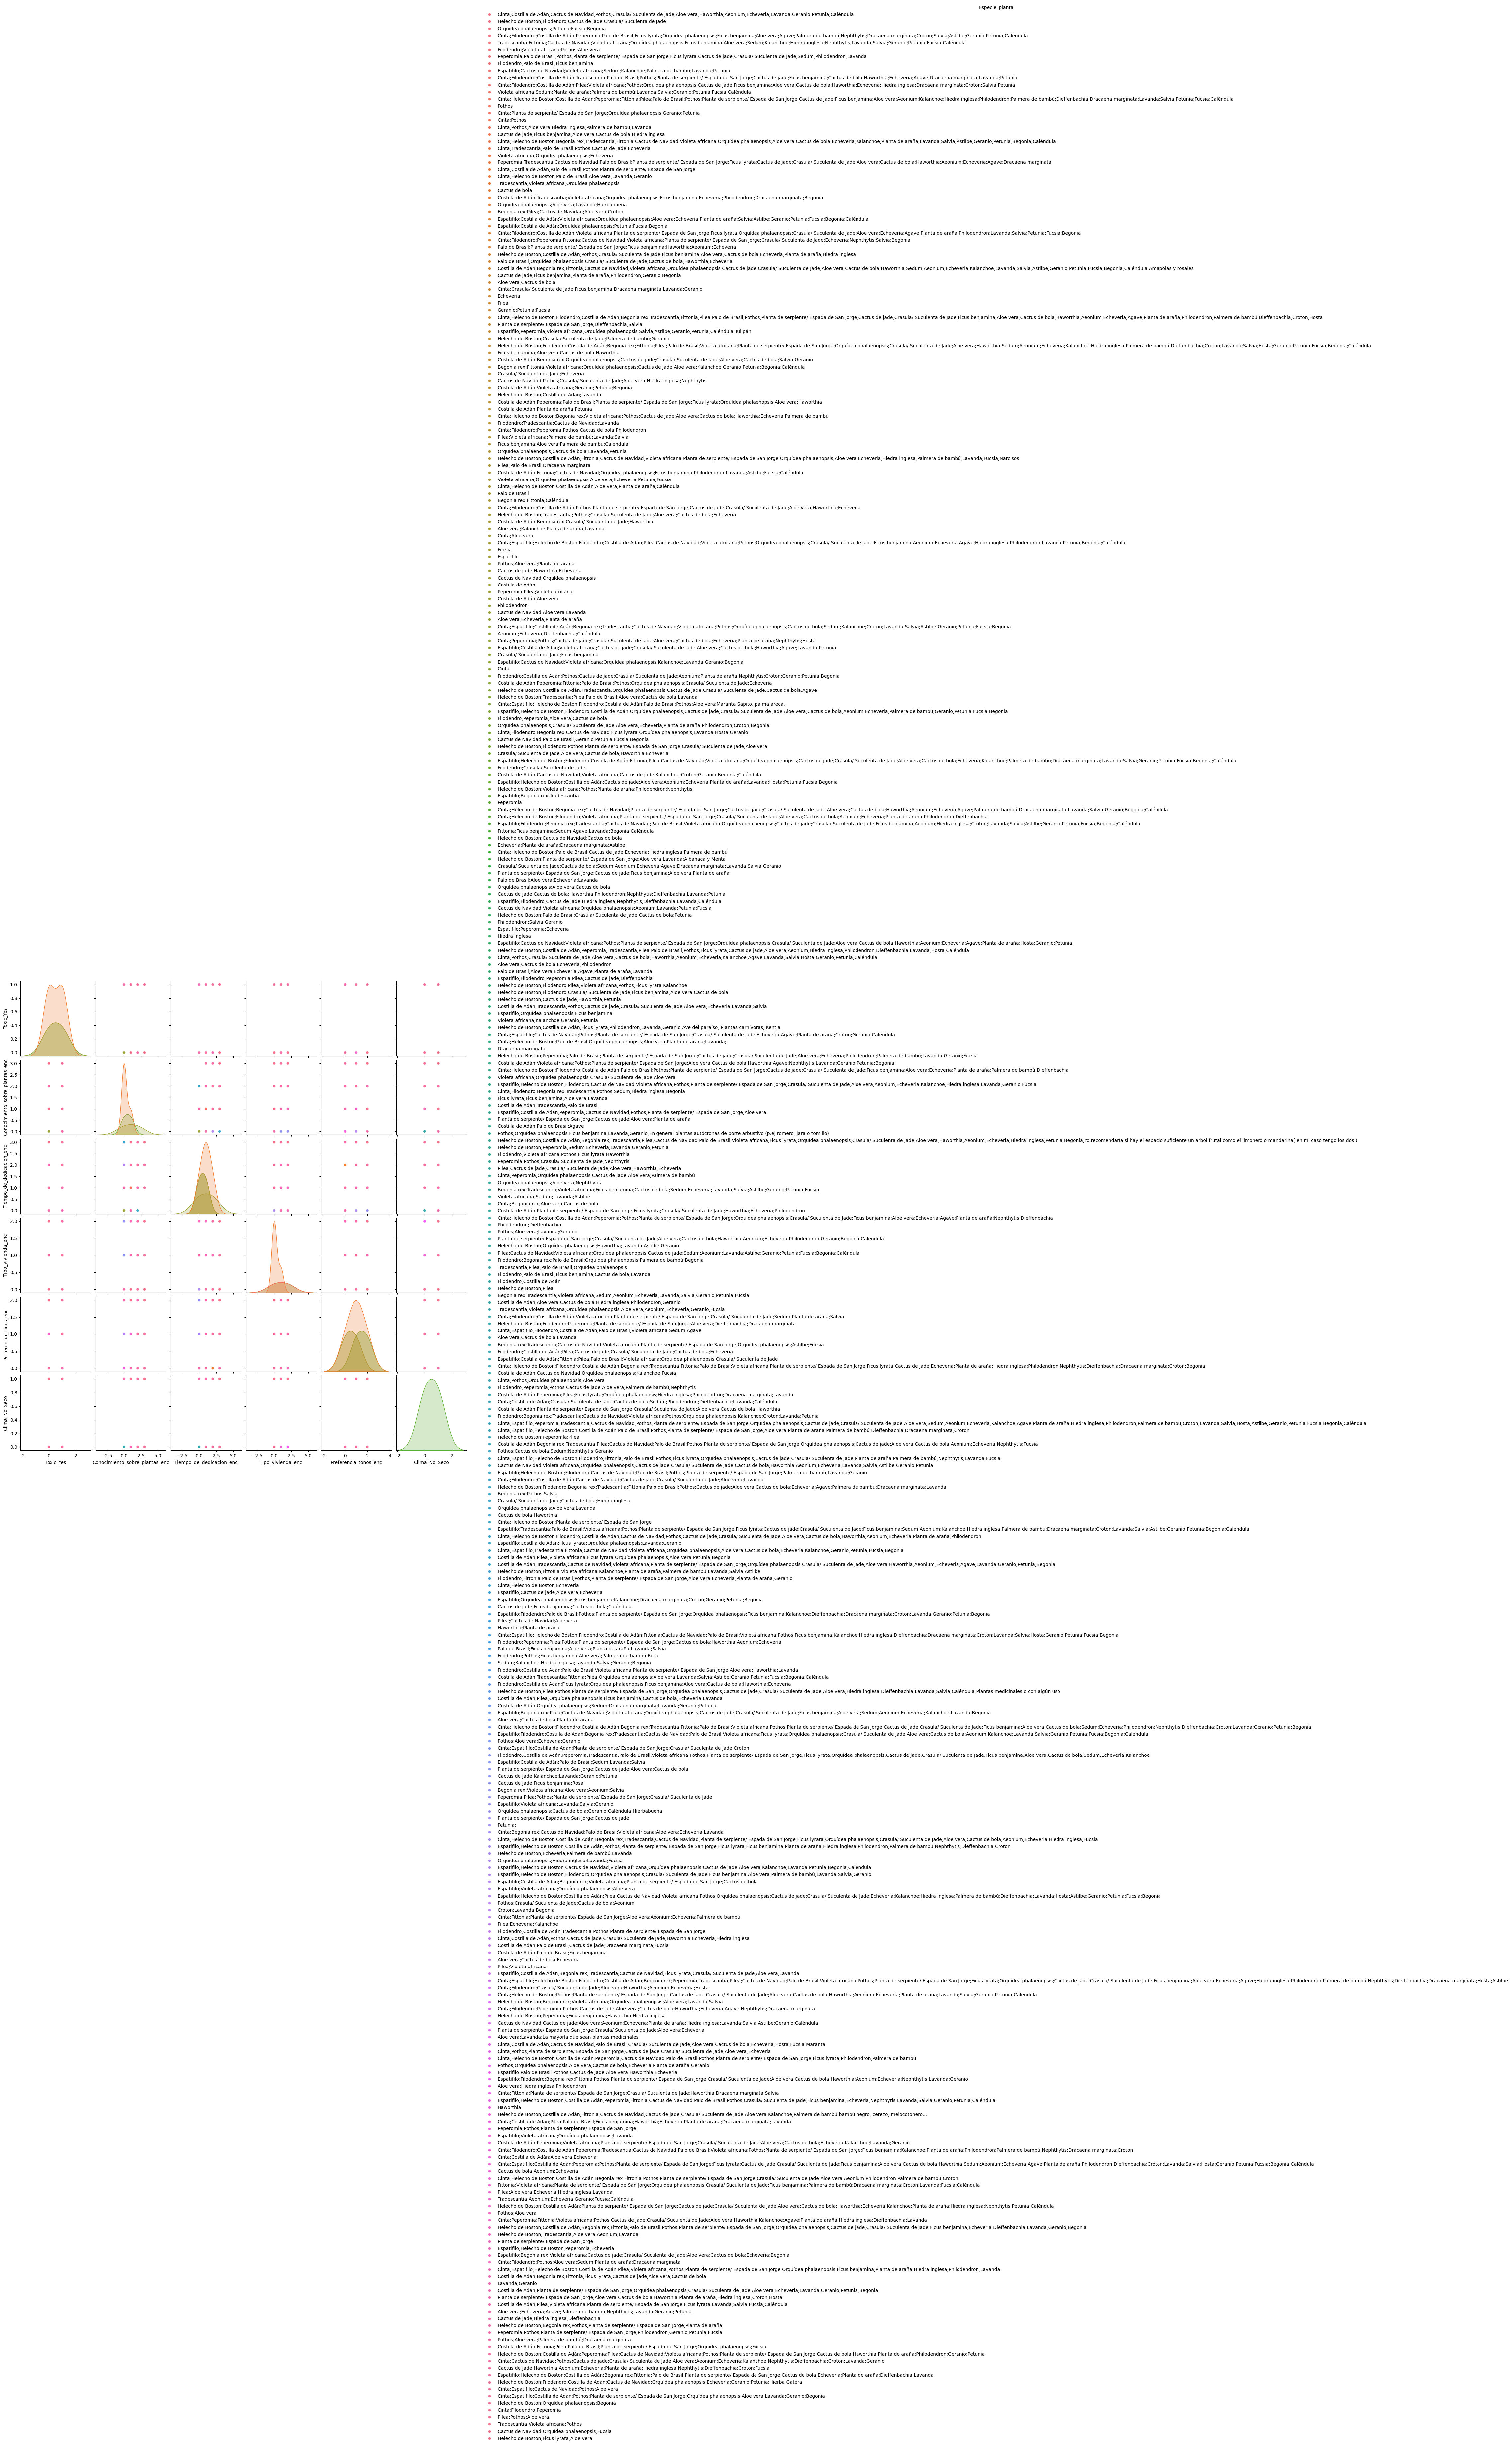

In [132]:
#sns.pairplot(df_encuesta, hue='Especie_planta')

In [ ]:
#correlation_matrix = df_final.drop(columns=['Dog breed'],axis=1).corr()
#corr_df = pd.DataFrame(correlation_matrix)
#corr_df = corr_df.round(3)
#corr_df